In [4]:
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from pandas.tools.plotting import scatter_matrix

In [141]:
import json
from pprint import pprint
with open('/Users/danielkershaw/Downloads/part-00004 (5)') as data_file:
    df = pd.read_json(json.load(data_file))
         

In [143]:
df.head()

,numberActivatedUsers,numberOfActivations,period,word
0,2,3,90,gainlands
1,1,2,60,gainlands
10,8,14,90,gagguni
100,2,14,90,hayk
1000,33,60,90,mansaac


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11afb5710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x114ce0150>]], dtype=object)

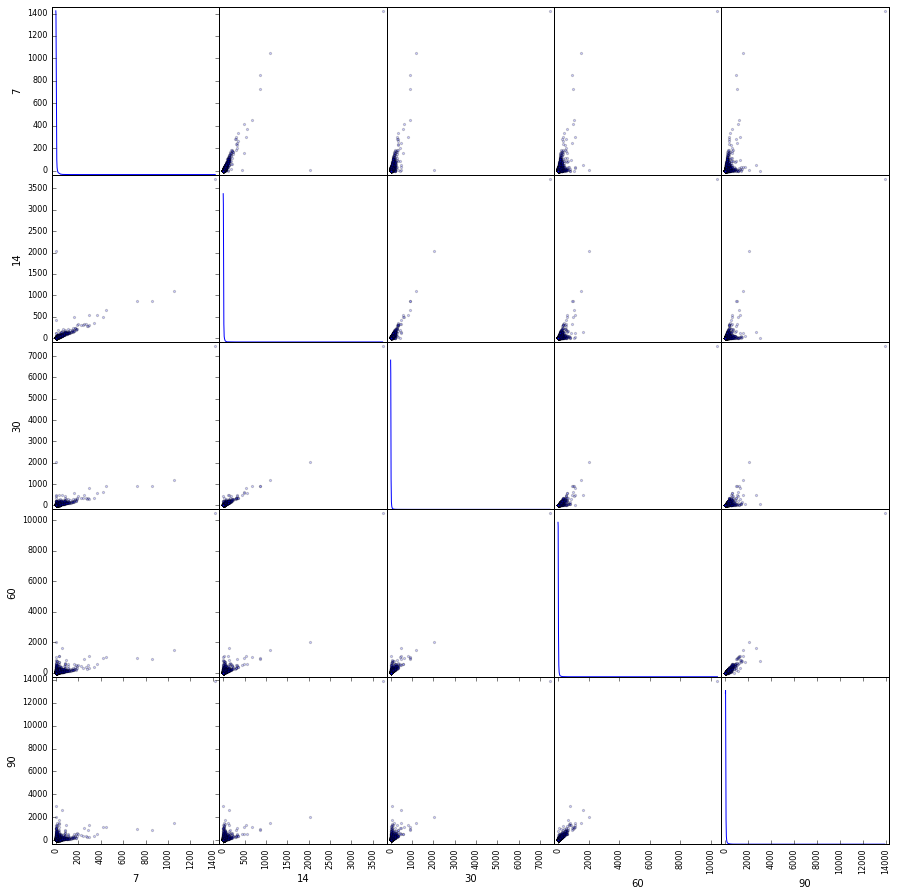

In [146]:
scatter_matrix(df.pivot(index='word', columns='period', values='numberOfActivations'), alpha=0.2, figsize=(15, 15), diagonal='kde')

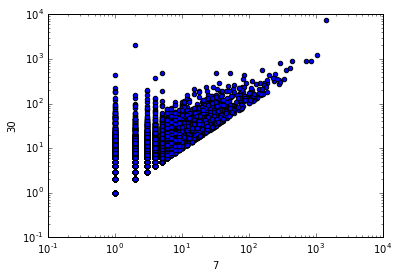

In [84]:
# df[(df["popularity"]< 1)].pivot(index='word', columns='timedelta', values='popularity').plot(kind='scatter',x=90, y=7)
df.pivot(index='word', columns='period', values='activation').plot(kind='scatter',x=7, y=30, loglog=True)

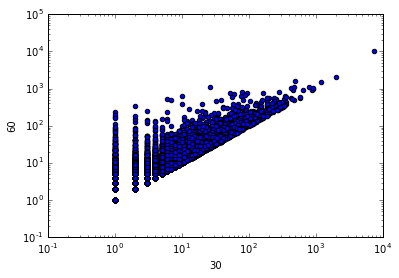

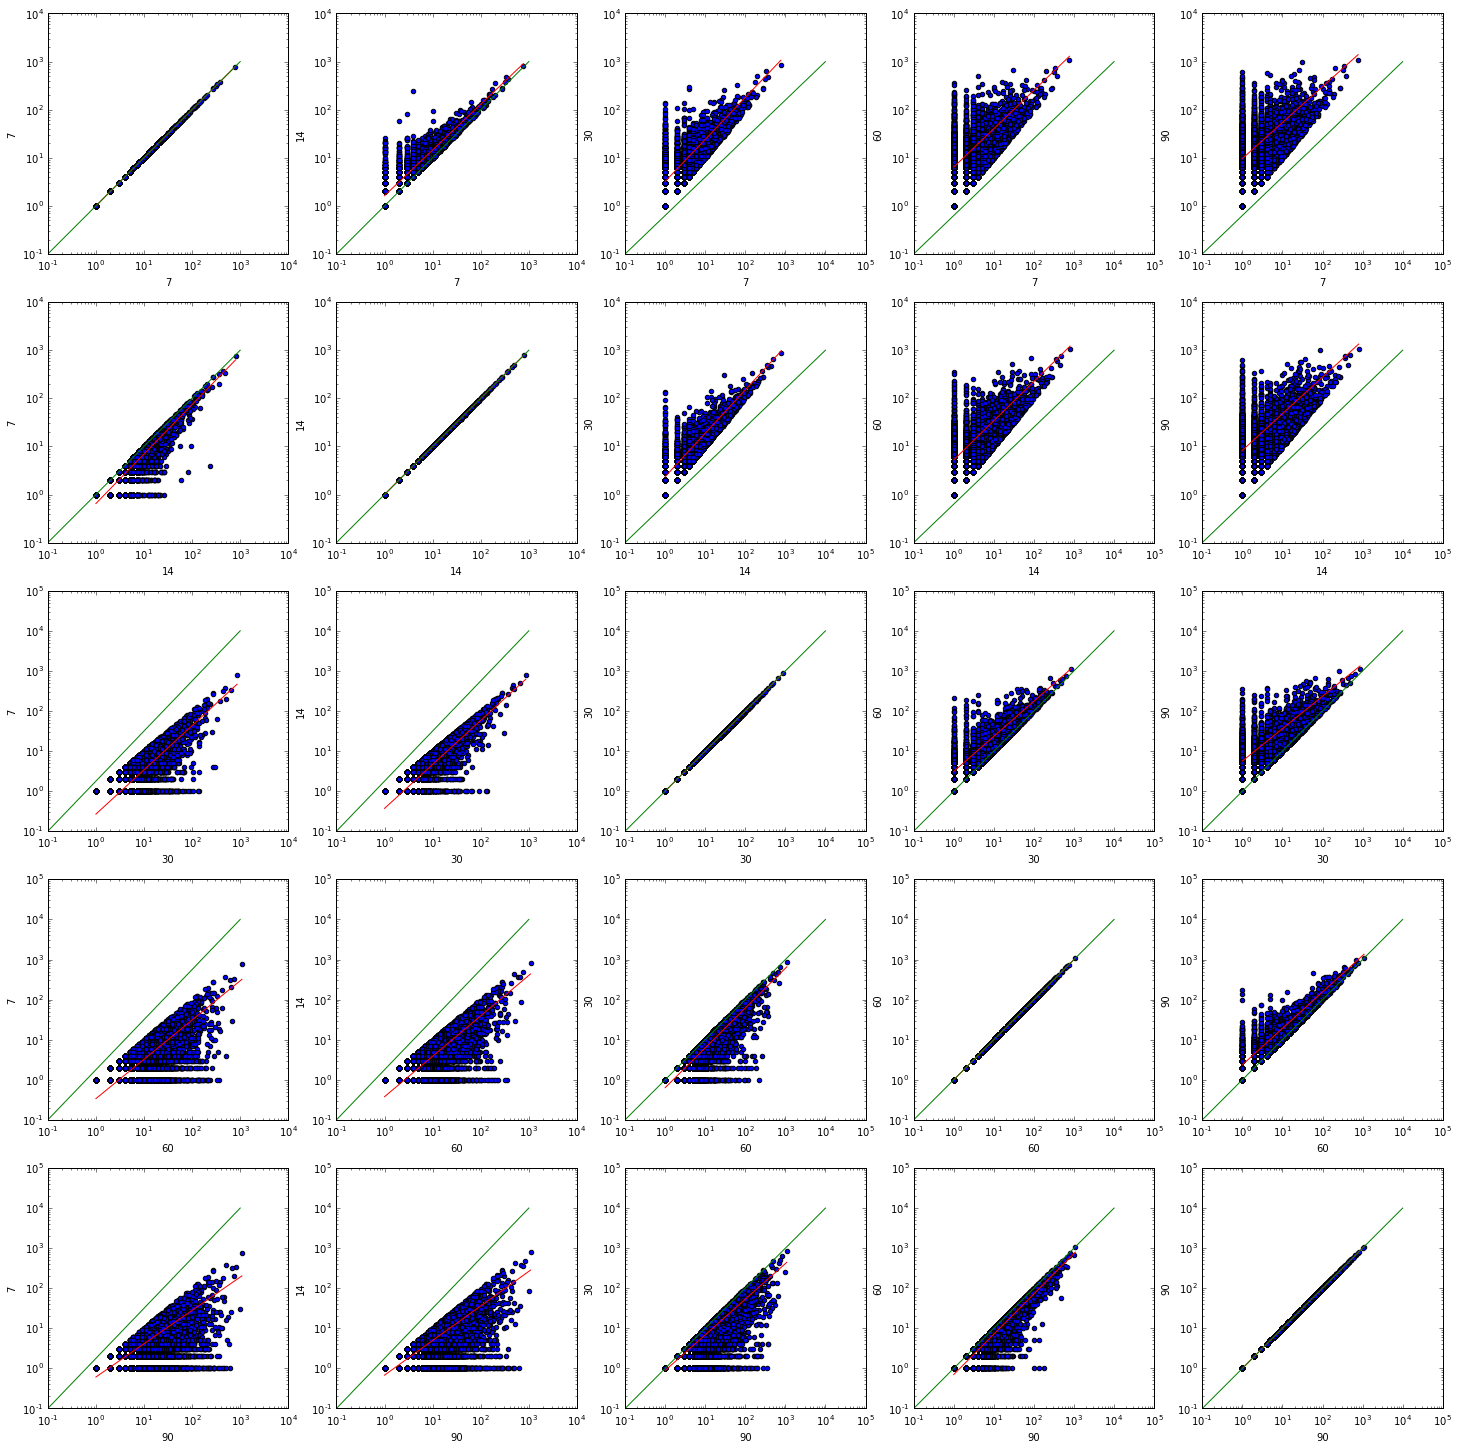

In [145]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
dfp = df.pivot(index='word', columns='period', values='numberActivatedUsers')
ttt = [7,14,30,60,90]
dfp.columns = ['a', 'b', 'c', 'd', 'e']

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(25, 25))

for x1 in range(0, len(dfp.columns)):
    for y1 in range(0, len(dfp.columns)):
        results =  smf.ols(dfp.columns[y1]+' ~ '+dfp.columns[x1], dfp).fit()
        intercept, slope = results.params
        r2 = results.rsquared
        x = np.array([min(dfp[dfp.columns[x1]]), max(dfp[dfp.columns[x1]])])
        y = intercept + slope * x
        ax = df.pivot(index='word', columns='period', values='numberActivatedUsers').plot(kind='scatter',x=ttt[x1], y=ttt[y1], loglog=True, ax=axes[x1,y1])
        axes[x1,y1].plot(x, y, 'r-')
        x_lims = axes[x1,y1].get_xlim()
        y_lims = axes[x1,y1].get_ylim()
        axes[x1,y1].plot(y_lims, x_lims, 'g-')
